# A/B Testing to Find the Best Marketing Strategy

# Control Group vs Test Group

### In marketing campaigns, marketers send campaign ads to selected customers ("test group") and putting aside the randomly selected some group of customers ("control group") from the campaign. The idea is to determine the effectiveness of the compaign by comparing the sales generated from the "test group" and "control group".

### For example, an ecommerce website has segmented customers to send "50% discount on clothing" campaign and they send this campaign to only 50k of them (“test group”), put aside a randomly-selected 5k customers (“control group”) who will not receive it. Once the campaign is over, they will determine the effectiveness of the campaign by comparing the additional revenues generated by the test group with those generated by the control group.

### It can also be used for comparing 2 different market Strategy.

In [1]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [2]:
df_Test = pd.read_csv("Test Group.csv")
df_Test

,Campaign Name,Date,Spend [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Test Campaign,01-08-2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,02-08-2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,03-08-2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,04-08-2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,05-08-2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,06-08-2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,07-08-2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,08-08-2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,09-08-2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10-08-2019,2790,95054,79632,8125,2312,1804,424,275


In [3]:
df_Control = pd.read_csv("Control Group.csv")
df_Control

,Campaign Name,Date,Spend [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,01-08-2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,02-08-2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,03-08-2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,04-08-2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,05-08-2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,06-08-2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,07-08-2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,08-08-2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,09-08-2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10-08-2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [4]:
#  Checking for NULL values
df_Test.isna().sum()

Campaign Name               0
Date                        0
Spend [USD]                 0
Number of Impressions       0
Reach                       0
Number of Website Clicks    0
Number of Searches          0
Number of View Content      0
Number of Add to Cart       0
Number of Purchase          0
dtype: int64

In [5]:
#  Checking for NULL values
df_Control.isna().sum()

Campaign Name               0
Date                        0
Spend [USD]                 0
Number of Impressions       1
Reach                       1
Number of Website Clicks    1
Number of Searches          1
Number of View Content      1
Number of Add to Cart       1
Number of Purchase          1
dtype: int64

In [6]:
# Changing data type
for column in df_Control.columns:
    if df_Control[column].dtype == 'float64':
        df_Control[column] = df_Control[column].fillna(df_Control[column].mean())
df_Control.dtypes

print(df_Control.isna().sum())
df_Control

Campaign Name               0
Date                        0
Spend [USD]                 0
Number of Impressions       0
Reach                       0
Number of Website Clicks    0
Number of Searches          0
Number of View Content      0
Number of Add to Cart       0
Number of Purchase          0
dtype: int64


,Campaign Name,Date,Spend [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,01-08-2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,02-08-2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,03-08-2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,04-08-2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,05-08-2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103
5,Control Campaign,06-08-2019,3083,109076.000000,87998.000000,4028.000000,1709.000000,1249.000000,784.0,764.000000
6,Control Campaign,07-08-2019,2544,142123.000000,127852.000000,2640.000000,1388.000000,1106.000000,1166.0,499.000000
7,Control Campaign,08-08-2019,1900,90939.000000,65217.000000,7260.000000,3047.000000,2746.000000,930.0,462.000000
8,Control Campaign,09-08-2019,2813,121332.000000,94896.000000,6198.000000,2487.000000,2179.000000,645.0,501.000000
9,Control Campaign,10-08-2019,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000


In [7]:
df_Test.dtypes

Campaign Name               object
Date                        object
Spend [USD]                  int64
Number of Impressions        int64
Reach                        int64
Number of Website Clicks     int64
Number of Searches           int64
Number of View Content       int64
Number of Add to Cart        int64
Number of Purchase           int64
dtype: object

In [8]:
df_Control.dtypes

Campaign Name                object
Date                         object
Spend [USD]                   int64
Number of Impressions       float64
Reach                       float64
Number of Website Clicks    float64
Number of Searches          float64
Number of View Content      float64
Number of Add to Cart       float64
Number of Purchase          float64
dtype: object

In [9]:
# Changing data type
for column in df_Test.columns:
    if df_Test[column].dtype == 'object':
        df_Test[column] = df_Test[column].astype('string')
df_Test.dtypes

Campaign Name               string
Date                        string
Spend [USD]                  int64
Number of Impressions        int64
Reach                        int64
Number of Website Clicks     int64
Number of Searches           int64
Number of View Content       int64
Number of Add to Cart        int64
Number of Purchase           int64
dtype: object

In [10]:
# Changing data type
for column in df_Control.columns:
    if df_Control[column].dtype == 'object':
        df_Control[column] = df_Control[column].astype('string')
df_Control.dtypes

Campaign Name                string
Date                         string
Spend [USD]                   int64
Number of Impressions       float64
Reach                       float64
Number of Website Clicks    float64
Number of Searches          float64
Number of View Content      float64
Number of Add to Cart       float64
Number of Purchase          float64
dtype: object

In [11]:
# Changing data type
for column in df_Control.columns:
    if df_Control[column].dtype == 'float64':
        df_Control[column] = df_Control[column].astype('int64')
df_Control.dtypes

Campaign Name               string
Date                        string
Spend [USD]                  int64
Number of Impressions        int64
Reach                        int64
Number of Website Clicks     int64
Number of Searches           int64
Number of View Content       int64
Number of Add to Cart        int64
Number of Purchase           int64
dtype: object

In [12]:
df_Control

,Campaign Name,Date,Spend [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,01-08-2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,02-08-2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,03-08-2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,04-08-2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,05-08-2019,1835,109559,88844,5320,2221,1943,1300,522
5,Control Campaign,06-08-2019,3083,109076,87998,4028,1709,1249,784,764
6,Control Campaign,07-08-2019,2544,142123,127852,2640,1388,1106,1166,499
7,Control Campaign,08-08-2019,1900,90939,65217,7260,3047,2746,930,462
8,Control Campaign,09-08-2019,2813,121332,94896,6198,2487,2179,645,501
9,Control Campaign,10-08-2019,2149,117624,91257,2277,2475,1984,1629,734


In [13]:
# Concatinating both the data frames
df = pd.concat([df_Control,df_Test],axis = 0,ignore_index=True)
df.dtypes

Campaign Name               string
Date                        string
Spend [USD]                  int64
Number of Impressions        int64
Reach                        int64
Number of Website Clicks     int64
Number of Searches           int64
Number of View Content       int64
Number of Add to Cart        int64
Number of Purchase           int64
dtype: object

In [14]:
print(df["Campaign Name"].value_counts())

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: Int64


In [15]:
# The data set that I downloaded has some wrong data ,that is some rows have Number of add to cart values greater than 
# Number of View Content ,which is shown below
df[df["Number of View Content"] < df ["Number of Add to Cart"]]

,Campaign Name,Date,Spend [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
3,Control Campaign,04-08-2019,1940,72878,61235,3065,1042,982,1183,340
6,Control Campaign,07-08-2019,2544,142123,127852,2640,1388,1106,1166,499
11,Control Campaign,12-08-2019,2319,116639,100189,2993,1397,1147,1439,794
13,Control Campaign,14-08-2019,1875,145248,118632,4521,1209,1149,1339,788
14,Control Campaign,15-08-2019,2774,132845,102479,4896,1179,1005,1641,366
19,Control Campaign,20-08-2019,2675,113430,78625,2578,1001,848,1709,299
27,Control Campaign,28-08-2019,2421,141654,125874,6287,1672,1589,1711,643
34,Test Campaign,05-08-2019,2297,114295,95138,5863,2106,858,956,768


In [16]:
# So just for this project lets swap the values df["Number of View Content"] and df ["Number of Add to Cart"] wherever this 
# condition satisfies - "df["Number of View Content"] < df ["Number of Add to Cart"]"
import pandas as pd
pd.options.mode.chained_assignment = None

for i in range(df.shape[0]):
    if(df["Number of View Content"][i] < df["Number of Add to Cart"][i]):
        temp = df["Number of Add to Cart"][i]
        df["Number of Add to Cart"][i] = df["Number of View Content"][i]
        df["Number of View Content"][i] = temp
df[df["Number of View Content"] < df ["Number of Add to Cart"]]

,Campaign Name,Date,Spend [USD],Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase


## Control campaign is pertforming better than Test campaign in getting more impressoins in less cost

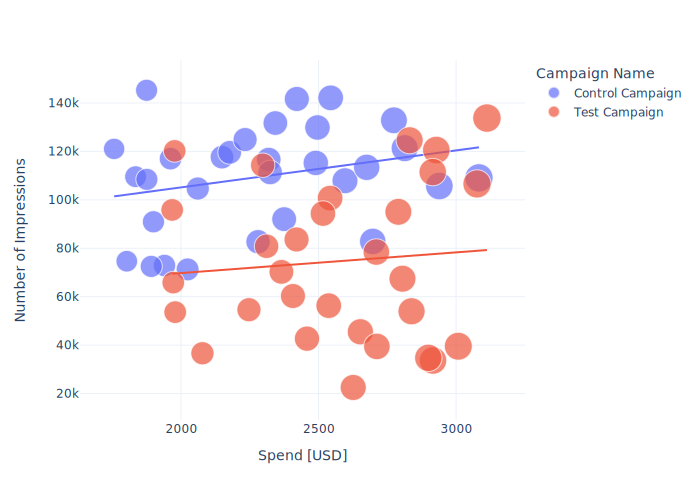

In [17]:
import plotly.express as px
fig = px.scatter(data_frame = df,
                    x = "Spend [USD]",
                    y = "Number of Impressions",
                    size = "Spend [USD]",
                    color = "Campaign Name",
                    trendline="ols")
fig.show("svg")

## Test campaign has more number of searches than Control campaign

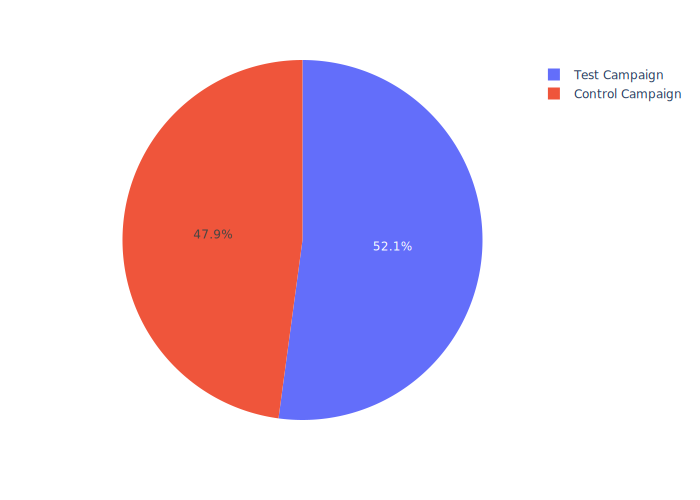

In [18]:
import plotly.express as px
# fig = px.pie(df, values="Number of Searches", names='Campaign Name', color_discrete_sequence=px.colors.sequential.RdBu)
fig = px.pie(df, values="Number of Searches", names='Campaign Name')
fig.show("svg")

## Test campaign has more number of Website Clicks than Control campaign

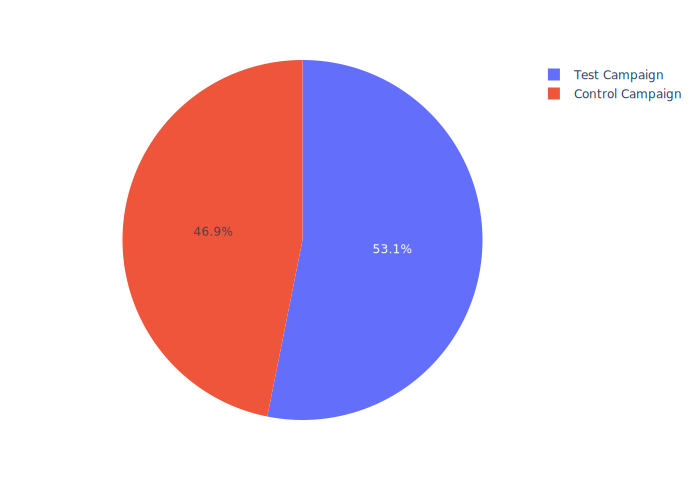

In [19]:
# fig = px.pie(df, values="Number of Searches", names='Campaign Name', color_discrete_sequence=px.colors.sequential.RdBu)
fig = px.pie(df, values="Number of Website Clicks", names='Campaign Name')
fig.show("svg")

## Control campaign has more number of Content views than Test campaign

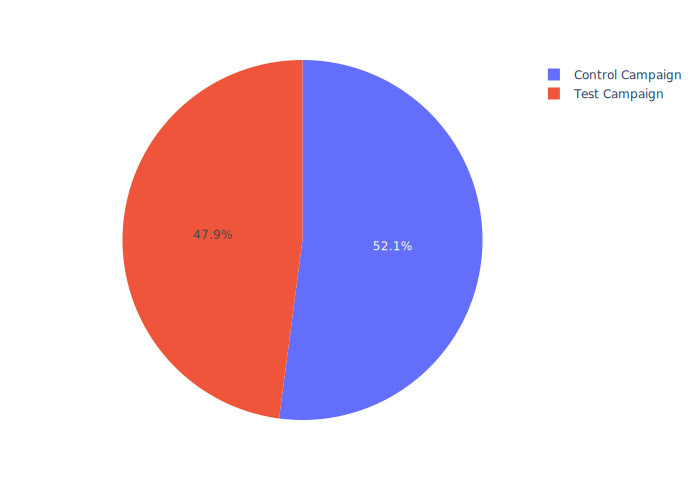

In [20]:
fig = px.pie(df, values="Number of View Content", names='Campaign Name')
fig.show("svg")

## Both Test campaign and  Control campaign almost has the same Number of Purchases

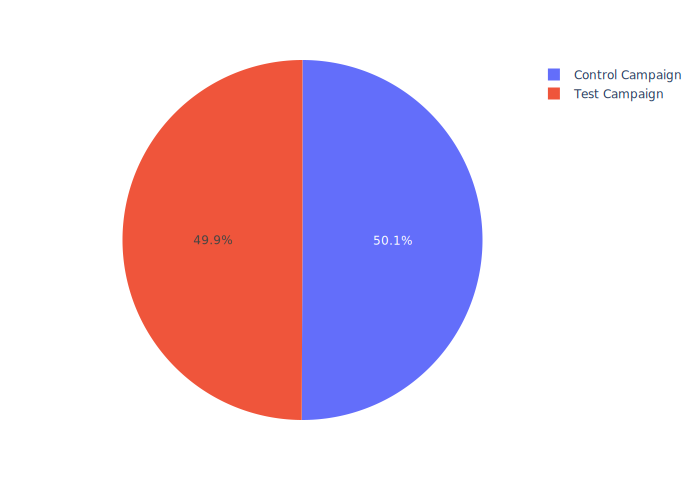

In [21]:
fig = px.pie(df, values="Number of Purchase", names='Campaign Name')
fig.show("svg")

## Add to cart by content viewed plot for both the campaigns are almost similar, but at the right end of the plot, lightblue dots of Control campaign shows that conversion rate(Add to cart/Content viewed) of Control campaign is little higher than Test campaign.

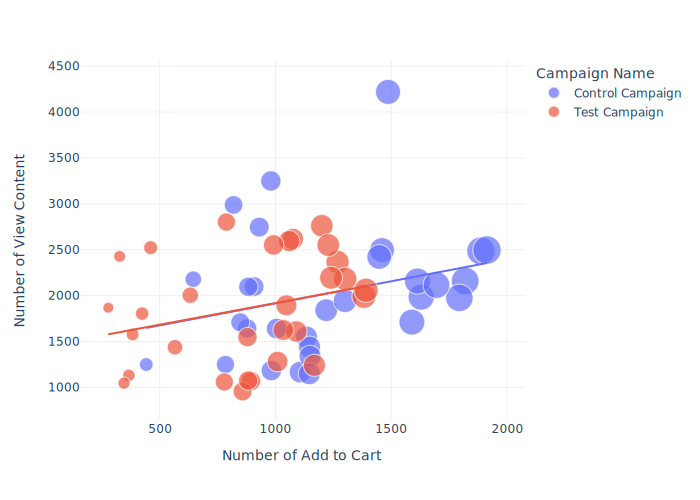

In [22]:
fig = px.scatter(data_frame = df, 
                    x="Number of Add to Cart",
                    y="Number of View Content", 
                    size="Number of Add to Cart", 
                    color= "Campaign Name", 
                    trendline="ols")
fig.show("svg")

## Number of Purchases by Add to cart scatter plot shows that shows that conversion rate(Purchases/Add to cart) of Test campaign is higher than Control campaign.

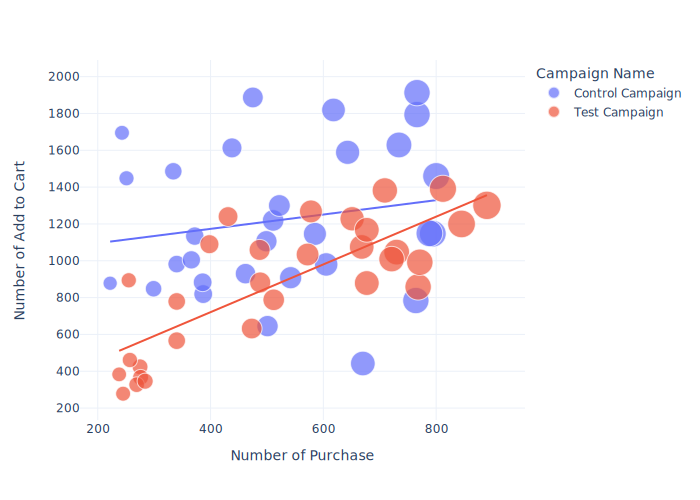

In [23]:
fig = px.scatter(data_frame = df, 
                    x="Number of Purchase",
                    y="Number of Add to Cart", 
                    size="Number of Purchase", 
                    color= "Campaign Name", 
                    trendline="ols")# Plotly Express allows you to add Ordinary Least Squares regression trendline to scatterplots with the trendline argument.
fig.show("svg")

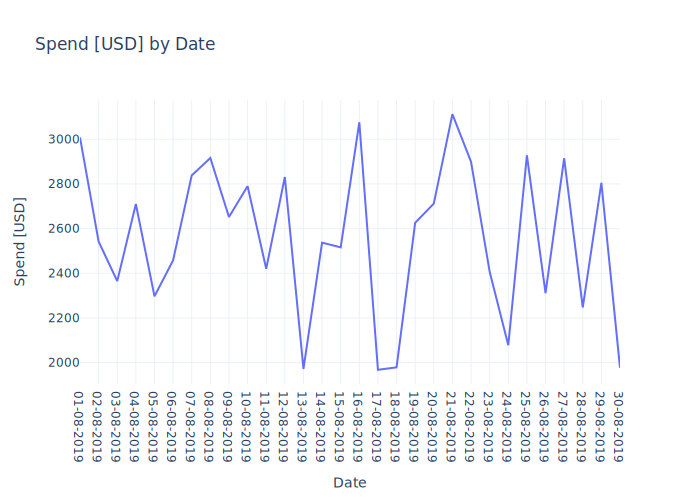

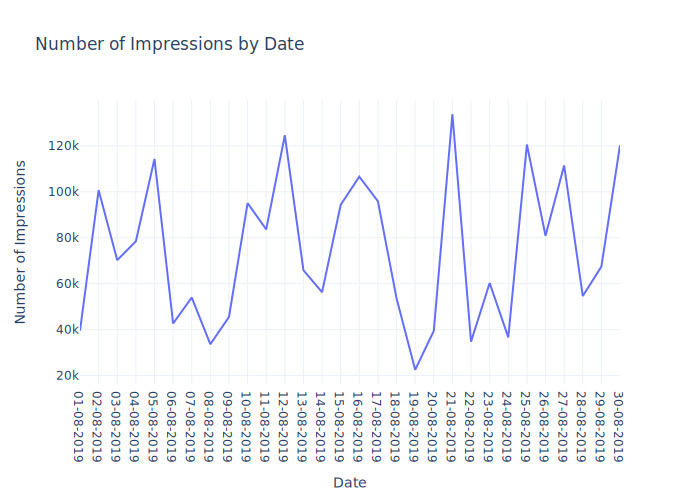

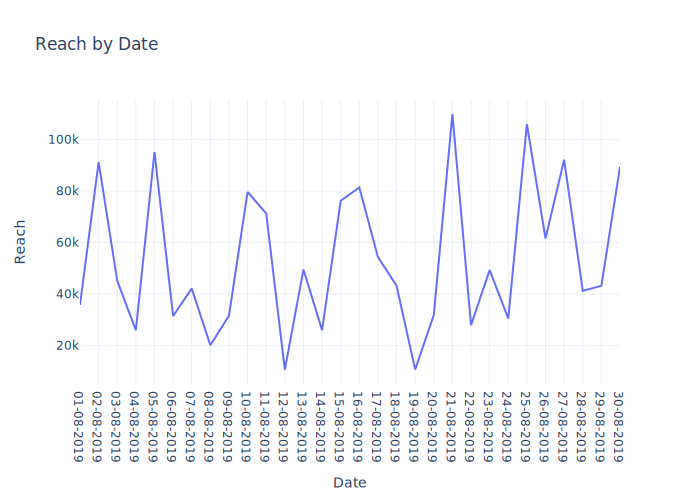

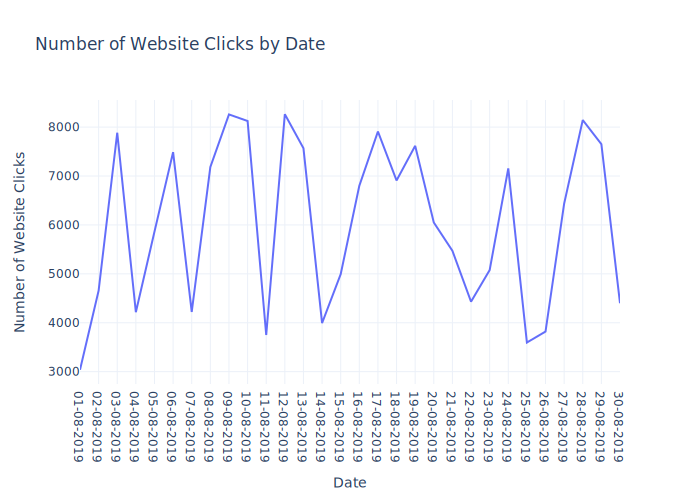

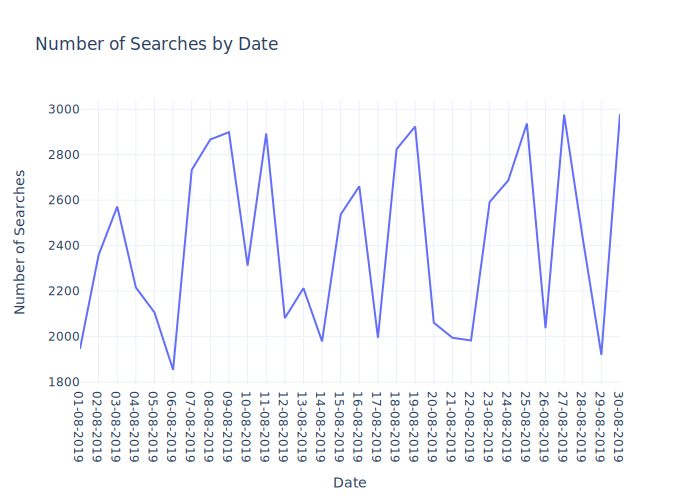

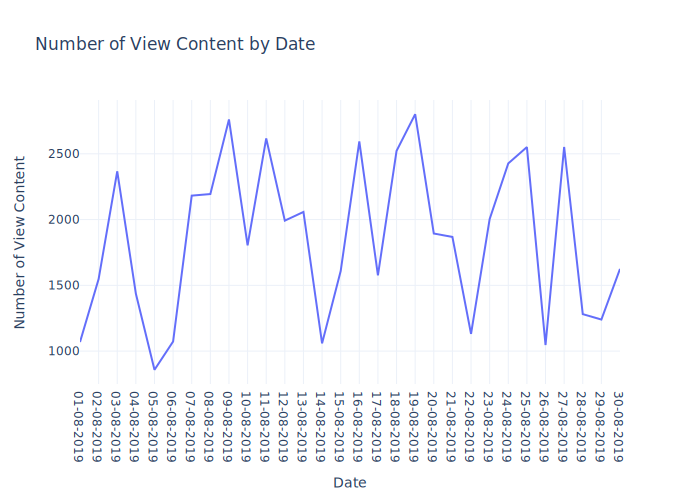

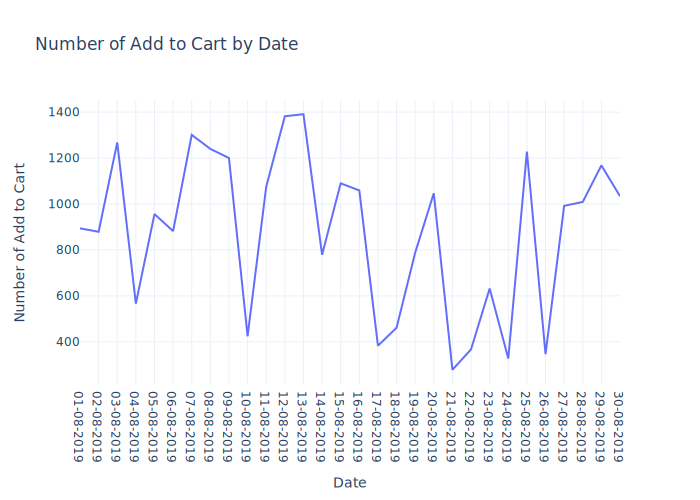

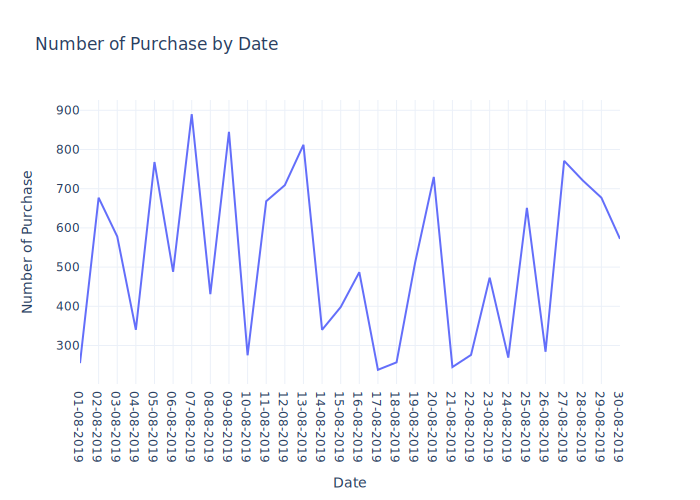

In [24]:
# Trendline charts for Test Campaign
for column in df.columns:
    if column not in ["Campaign Name","Date"]:
        fig = px.line(df_Test, x="Date", y=column, title=  column + " by Date")  
        fig.show("svg")

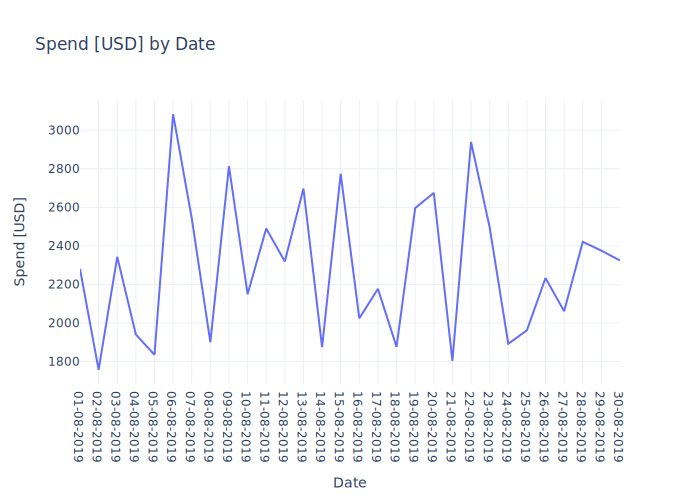

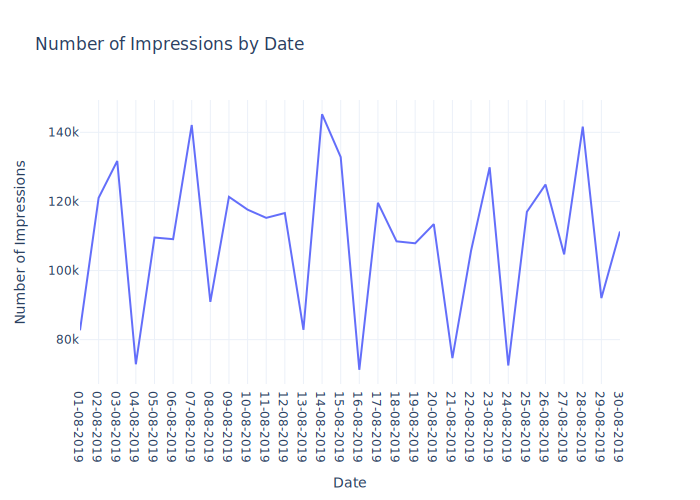

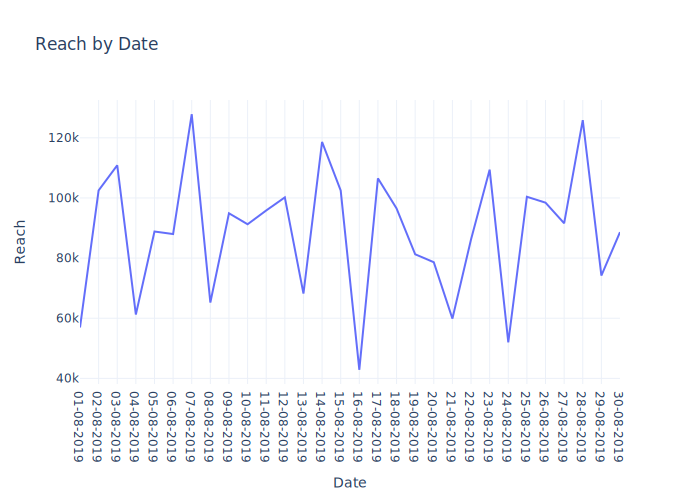

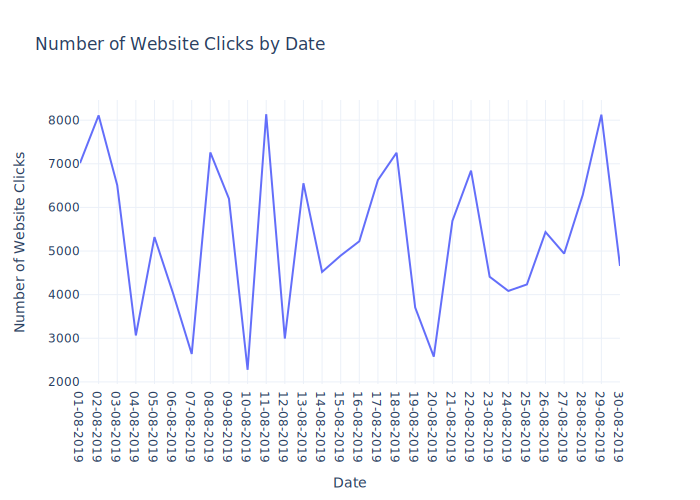

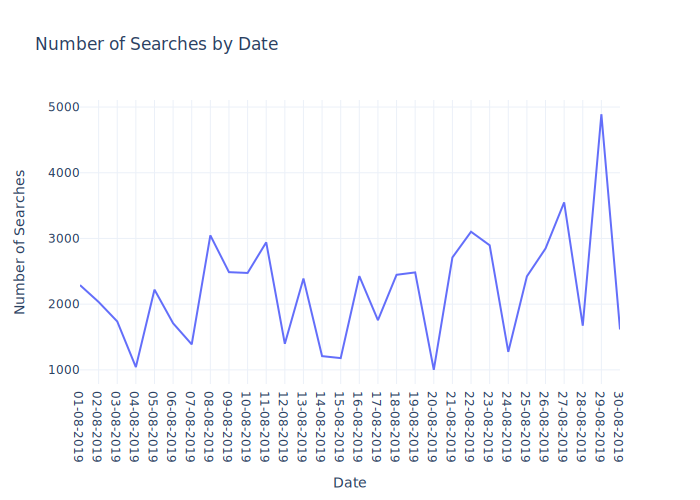

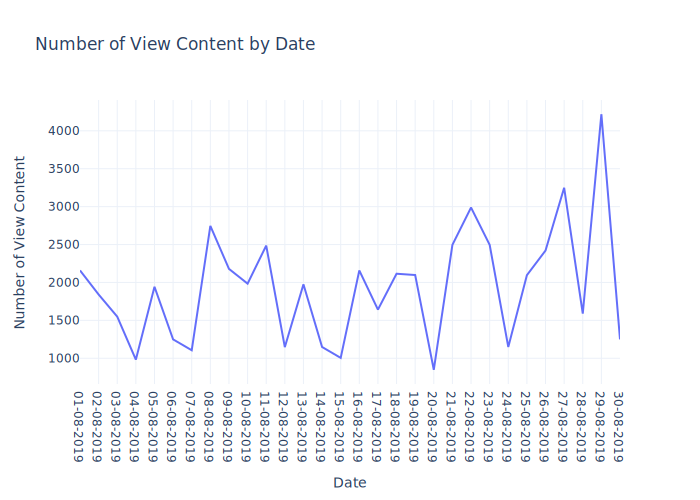

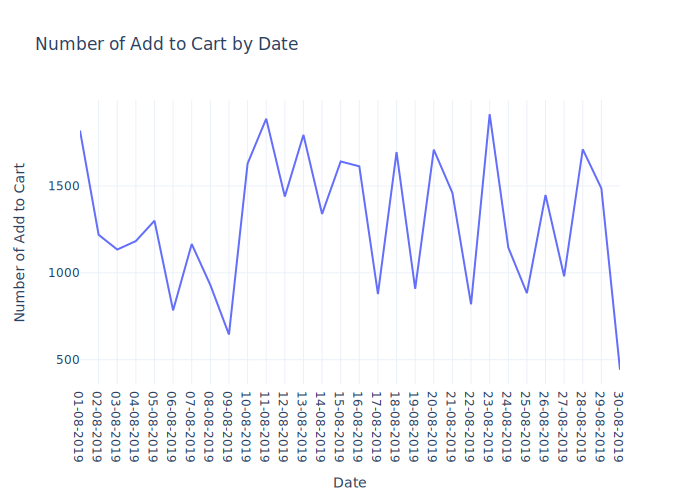

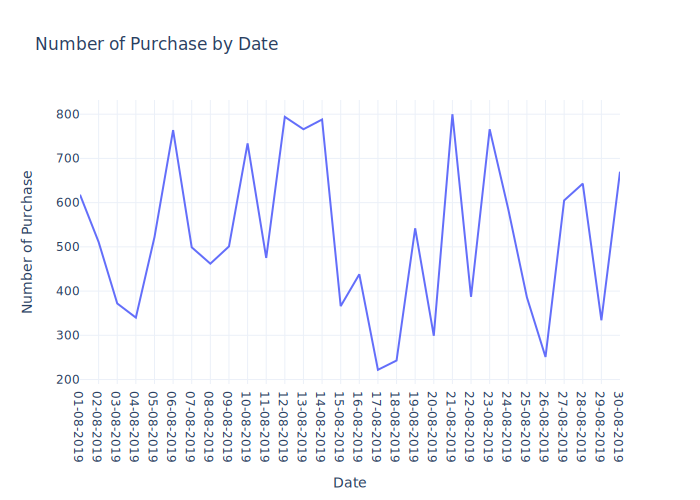

In [25]:
# Trendline charts for Control Campaign
for column in df.columns:
    if column not in ["Campaign Name","Date"]:
        fig = px.line(df_Control, x="Date", y=column, title=  column + " by Date")  
        fig.show("svg")

## Add Spend per Purchase

In [26]:
Control_AddSpendperPurchase = sum(df[df["Campaign Name"] == "Control Campaign"]["Spend [USD]"])/sum(df[df["Campaign Name"] == "Control Campaign"]["Number of Purchase"]) 
print("ControlCampaign_AddSpendperPurchase "+ str(round(Control_AddSpendperPurchase,2)) + " USD")

Test_AddSpendperPurchase = sum(df[df["Campaign Name"] == "Test Campaign"]["Spend [USD]"])/sum(df[df["Campaign Name"] == "Test Campaign"]["Number of Purchase"]) 
print("TestCampaign_AddSpendperPurchase    " + str(round(Test_AddSpendperPurchase,2)) + " USD")

ControlCampaign_AddSpendperPurchase 4.38 USD
TestCampaign_AddSpendperPurchase    4.92 USD


## Add Spend per Click

In [27]:
Control_AddSpendperClicks = sum(df[df["Campaign Name"] == "Control Campaign"]["Spend [USD]"])/sum(df[df["Campaign Name"] == "Control Campaign"]["Number of Website Clicks"]) 
print("ControlCampaign_AddSpendperClicks "+ str(round(Control_AddSpendperClicks,2)) + " USD")

Test_AddSpendperClicks = sum(df[df["Campaign Name"] == "Test Campaign"]["Spend [USD]"])/sum(df[df["Campaign Name"] == "Test Campaign"]["Number of Website Clicks"]) 
print("TestCampaign_AddSpendperClicks    " + str(round(Test_AddSpendperClicks,2)) + " USD")

ControlCampaign_AddSpendperClicks 0.43 USD
TestCampaign_AddSpendperClicks    0.42 USD


## Conversion Rate (Purchase per Click)

In [28]:
Control_PurchaseperClicks = sum(df[df["Campaign Name"] == "Control Campaign"]["Number of Purchase"])/sum(df[df["Campaign Name"] == "Control Campaign"]["Number of Website Clicks"]) 
print("ControlCampaign_PurchaseperClicks "+ str(round(Control_PurchaseperClicks,2)))

Test_PurchaseperClicks = sum(df[df["Campaign Name"] == "Test Campaign"]["Number of Purchase"])/sum(df[df["Campaign Name"] == "Test Campaign"]["Number of Website Clicks"]) 
print("TestCampaign_PurchaseperClicks    " + str(round(Test_PurchaseperClicks,2)))

ControlCampaign_PurchaseperClicks 0.1
TestCampaign_PurchaseperClicks    0.09


### Conversion Rate for Control campaign is higher than Test campaign 

## Click Through Rate(Click per Impressions)

In [29]:
Control_CTR = sum(df[df["Campaign Name"] == "Control Campaign"]["Number of Website Clicks"])/sum(df[df["Campaign Name"] == "Control Campaign"]["Number of Impressions"]) 
print("ControlCampaign_CTR "+ str(round(Control_CTR,2)))

Test_CTR = sum(df[df["Campaign Name"] == "Test Campaign"]["Number of Website Clicks"])/sum(df[df["Campaign Name"] == "Test Campaign"]["Number of Impressions"]) 
print("TestCampaign_CTR    " + str(round(Test_CTR,2)))

ControlCampaign_CTR 0.05
TestCampaign_CTR    0.08


In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #To supress future warning

Control_sum = df_Control.sum()
Test_sum = df_Test.sum()
print("Control Campaign\n")
print(Control_sum)

print("\nTest Campaign\n")
print(Test_sum)

Control Campaign

Spend [USD]                   68653
Number of Impressions       3286792
Reach                       2665347
Number of Website Clicks     159623
Number of Searches            66639
Number of View Content        58313
Number of Add to Cart         39000
Number of Purchase            15683
dtype: int64

Test Campaign

Spend [USD]                   76892
Number of Impressions       2237544
Reach                       1604747
Number of Website Clicks     180970
Number of Searches            72569
Number of View Content        55740
Number of Add to Cart         26446
Number of Purchase            15637
dtype: int64


# Important Points

## 1. Control campaign is better in reaching more users and providing more engagement in less cost than Test Campaign.

## 2. Click Through Rate for test campaign (8%) is higher than Control Campaign (5%)

## 3. Ad Spend per Purchase is less for Control Campaign (4.38 USD) than Test Campaign                                                       (4.92 USD)

# Conclusion

## There are more number of purchases and reach for control campaign which has created more sales than test campaign but even though engagement and reach is less for test campaign it has good conversion rate it means test campaign add is reaching the relevant audience. 

## Control Campaign : Where more reach and engagenment is required.
## Test Campaign       : Where specific audience targetted